# FORPデータを用いた解析と可視化

気候予測データセットds2022に含まれている日本域海洋予測データFORPは、
気象研究所共用海洋モデルMRI.COMv4を用いて、
第5次結合モデル相互比較プロジェクトCMIP5の複数の気候モデル出力や大気再解析データを
外力として作成された海域の過去再現・将来予測データセットである。

今回は北太平洋を対象とした空間解像度10kmの
[FORP-NP10](https://search.diasjp.net/ja/dataset/FORP_NP10_version4)
を用いる。

ライブラリをインポートする。

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pathlib

データの読み込みを試行するためJRA55-doを外力としたFORP ver4の1981年1月の水温のデータを読み込む。

なお、ファイルのパスは左側のブラウザの中で、dias-data、FORP、FORP-NP10、version4、JRA55do_historical_ver4、nc_mon、1981と
順にたどって、forp-np-v4_thetao_mn_198101.ncを選択し、右クリックして"Copy Path"を選択すると得られる。

In [2]:
nameIN = "dias-data/FORP/FORP-NP10/version4/JRA55do_historical_ver4/nc_mon/1981/forp-np-v4_thetao_mn_198101.nc"

In [3]:
ds = xr.open_dataset(nameIN)
ds

/usr/local/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.20.0
  warnings.warn(
/usr/local/lib/python3.11/site-packages/xarray/coding/times.py:172: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Dataset> Size: 386MB
Dimensions:  (time: 1, lon: 2049, lat: 784, lev: 60)
Coordinates:
  * time     (time) datetime64[ns] 8B 1981-01-01
  * lon      (lon) float64 16kB 98.82 98.91 99.0 99.09 ... 284.8 284.9 285.0
  * lat      (lat) float64 6kB -15.2 -15.1 -15.0 -14.9 ... 62.8 62.9 63.0 63.1
  * lev      (lev) float64 480B 1.0 3.5 6.5 10.0 ... 4.975e+03 5.5e+03 6.15e+03
Data variables:
    thetao   (time, lev, lat, lon) float32 386MB ...
Attributes:
    CDI:                     Climate Data Interface version 1.9.9 (https://mp...
    Conventions:             None
    title:                   The Future Ocean Regional Projection (FORP) data...
    frequency:               mon
    institution:             Japan Agency for Marine-Earth Science and Techno...
    source:                  MRI.COM ver4.6
    driving_model:           JRA55do
    experiment:              historical
    license:                 Creative Commons Attribution 4.0 International L...
    project:                 Integrated Research Program for Advancing Climat...
    format_conversion_date:  Sat Jul 30 15:00:39 JST 2022
    CDO:                     Climate Data Operators version 1.9.9 (https://mp...

水温(thetao)は経度、緯度、鉛直層、時間の四次元データであることがわかる。

一番水面に近い鉛直層(lev=0)を選択して、水温の空間分布を見てみる。

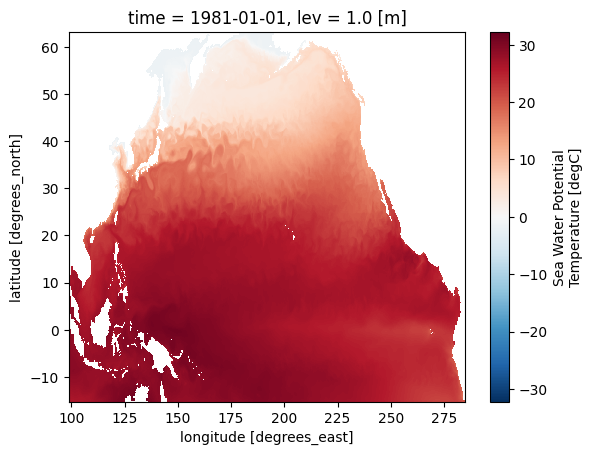

In [4]:
ds.thetao.isel(lev=0).plot()

"ds"を削除する。

In [5]:
del ds

次に1981年の12ヶ月分のファイルをまとめて読むために``open_mfdataset()``を利用する。

In [6]:
files = "dias-data/FORP/FORP-NP10/version4/JRA55do_historical_ver4/nc_mon/1981/forp-np-v4_thetao_mn_1981*.nc"

In [7]:
ds = xr.open_mfdataset(files)
ds

/usr/local/lib/python3.11/site-packages/xarray/coding/times.py:172: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Dataset> Size: 5GB
Dimensions:  (time: 12, lev: 60, lat: 784, lon: 2049)
Coordinates:
  * time     (time) datetime64[ns] 96B 1981-01-01 1981-02-01 ... 1981-12-01
  * lon      (lon) float64 16kB 98.82 98.91 99.0 99.09 ... 284.8 284.9 285.0
  * lat      (lat) float64 6kB -15.2 -15.1 -15.0 -14.9 ... 62.8 62.9 63.0 63.1
  * lev      (lev) float64 480B 1.0 3.5 6.5 10.0 ... 4.975e+03 5.5e+03 6.15e+03
Data variables:
    thetao   (time, lev, lat, lon) float32 5GB dask.array<chunksize=(1, 1, 784, 2049), meta=np.ndarray>
Attributes:
    CDI:                     Climate Data Interface version 1.9.9 (https://mp...
    Conventions:             None
    title:                   The Future Ocean Regional Projection (FORP) data...
    frequency:               mon
    institution:             Japan Agency for Marine-Earth Science and Techno...
    source:                  MRI.COM ver4.6
    driving_model:           JRA55do
    experiment:              historical
    license:                 Creative Commons Attribution 4.0 International L...
    project:                 Integrated Research Program for Advancing Climat...
    format_conversion_date:  Sat Jul 30 15:00:39 JST 2022
    CDO:                     Climate Data Operators version 1.9.9 (https://mp...

次元(Dimensions)で、timeが12となっていることから12ヶ月分のデータを読み込めていることがわかる。

鉛直層の最上層(lev=0)で北緯40度、東経150度に最も近い格子点の水温をSSTとして抽出する。

In [8]:
sst = ds.thetao.isel(lev=0).sel(lat=40,lon=150)
sst

<xarray.DataArray 'thetao' (time: 12)> Size: 48B
dask.array<getitem, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 96B 1981-01-01 1981-02-01 ... 1981-12-01
    lon      float64 8B 150.0
    lat      float64 8B 40.0
    lev      float64 8B 1.0
Attributes:
    long_name:      Sea Water Potential Temperature
    units:          degC
    standard_name:  sea_water_potential_temperature

抽出したSSTの季節変化を見てみる。

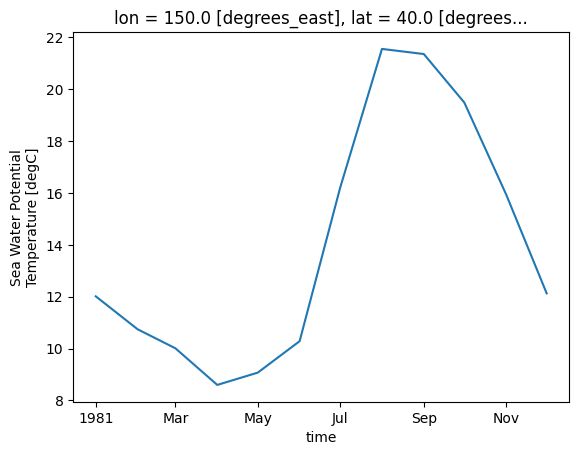

In [9]:
sst.plot()

## 練習

別の1年間のデータを読み込んで、ある月（time）の特定の深度（lev）の水温の空間分布を可視化してみよ。

In [ ]:
# ヒント：isel()を2回使う


In [ ]:
del files, ds, sst

## JRA55doの過去再現実験を読み込む

1970年から2018年の水温のファイル名のリストを作成する。

In [10]:
bdir = "dias-data/FORP/FORP-NP10/version4/JRA55do_historical_ver4/nc_mon/"
files = list(pathlib.Path(bdir).glob("**/forp-np-v4_thetao_mn_*.nc"))

``open_mfdataset()``を用いて複数のファイルを開く。

In [11]:
ds = xr.open_mfdataset(files)
ds

/usr/local/lib/python3.11/site-packages/xarray/coding/times.py:172: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Dataset> Size: 227GB
Dimensions:  (time: 588, lev: 60, lat: 784, lon: 2049)
Coordinates:
  * time     (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2018-12-01
  * lon      (lon) float64 16kB 98.82 98.91 99.0 99.09 ... 284.8 284.9 285.0
  * lat      (lat) float64 6kB -15.2 -15.1 -15.0 -14.9 ... 62.8 62.9 63.0 63.1
  * lev      (lev) float64 480B 1.0 3.5 6.5 10.0 ... 4.975e+03 5.5e+03 6.15e+03
Data variables:
    thetao   (time, lev, lat, lon) float32 227GB dask.array<chunksize=(1, 1, 784, 2049), meta=np.ndarray>
Attributes:
    CDI:                     Climate Data Interface version 1.9.9 (https://mp...
    Conventions:             None
    title:                   The Future Ocean Regional Projection (FORP) data...
    frequency:               mon
    institution:             Japan Agency for Marine-Earth Science and Techno...
    source:                  MRI.COM ver4.6
    driving_model:           JRA55do
    experiment:              historical
    license:                 Creative Commons Attribution 4.0 International L...
    project:                 Integrated Research Program for Advancing Climat...
    format_conversion_date:  Sat Jul 30 14:46:21 JST 2022
    CDO:                     Climate Data Operators version 1.9.9 (https://mp...

Dimensionsでtimeが588となっていることから1970年から2018年までのデータの読み込み準備ができたことがわかる。

鉛直層の最上層(lev=0)の水温をSSTとして抽出する。

In [12]:
sst1 = ds.thetao.isel(lev=0)
sst1

<xarray.DataArray 'thetao' (time: 588, lat: 784, lon: 2049)> Size: 4GB
dask.array<getitem, shape=(588, 784, 2049), dtype=float32, chunksize=(1, 784, 2049), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2018-12-01
  * lon      (lon) float64 16kB 98.82 98.91 99.0 99.09 ... 284.8 284.9 285.0
  * lat      (lat) float64 6kB -15.2 -15.1 -15.0 -14.9 ... 62.8 62.9 63.0 63.1
    lev      float64 8B 1.0
Attributes:
    long_name:      Sea Water Potential Temperature
    units:          degC
    standard_name:  sea_water_potential_temperature

"ds"を削除する。

In [13]:
del ds

北緯40度、東経150度に最も近い格子点のSSTの時系列をプロットしてみる。

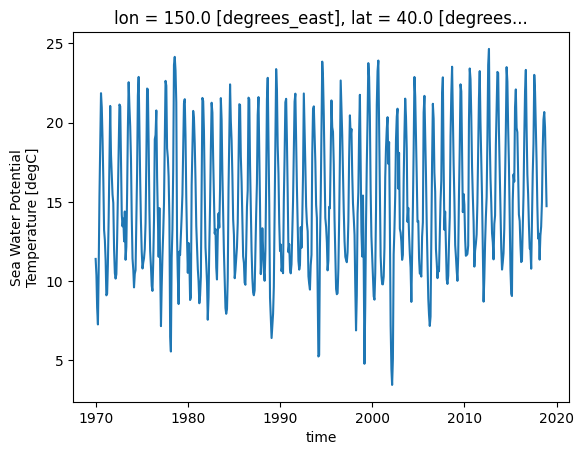

In [14]:
sst1.sel(lat=40, lon=150).plot()

1976年から2005年までの30年間を基準年とする気候値を作成する。
``groupby()``で各月ごとで計算する設定を行い、平均値を計算するために``mean()``を用いる。

In [15]:
clim1 = sst1.sel(time=slice("1976-01-01","2005-12-31")).groupby("time.month").mean(dim="time")
clim1

<xarray.DataArray 'thetao' (month: 12, lat: 784, lon: 2049)> Size: 77MB
dask.array<stack, shape=(12, 784, 2049), dtype=float32, chunksize=(1, 784, 2049), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 16kB 98.82 98.91 99.0 99.09 ... 284.8 284.9 285.0
  * lat      (lat) float64 6kB -15.2 -15.1 -15.0 -14.9 ... 62.8 62.9 63.0 63.1
    lev      float64 8B 1.0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:      Sea Water Potential Temperature
    units:          degC
    standard_name:  sea_water_potential_temperature

SSTの1月の気候値を可視化してみる。

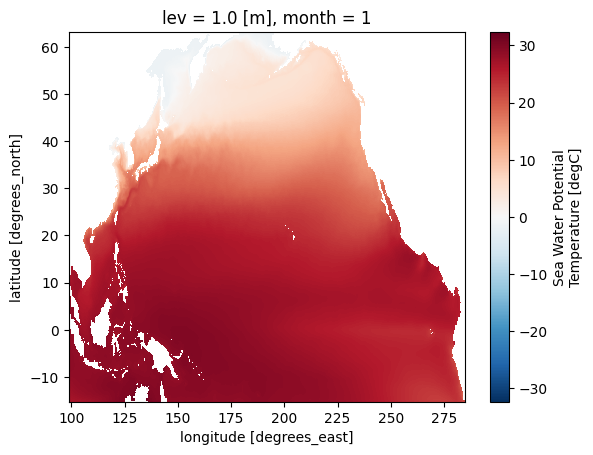

In [16]:
clim1.isel(month=0).plot()

求めた気候値をnetcdf形式のファイルに保存する。

In [17]:
clim1.to_netcdf('FORPv4_JRA55do_thetao_clim.nc')

作成した気候値のファイルを左側のファイルのリストで"FORPv4_JRA55do_thetao_clim.nc"を選択し、
右クリックして現れるメニューから"Download"を選択し、手元のコンピュータにダウンロードする。

作成した気候値からの偏差を求める。
ここでも``groupby()``を用いる。

In [18]:
anom1 = sst1.groupby("time.month") - clim1
anom1

<xarray.DataArray 'thetao' (time: 588, lat: 784, lon: 2049)> Size: 4GB
dask.array<sub, shape=(588, 784, 2049), dtype=float32, chunksize=(1, 784, 2049), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2018-12-01
  * lon      (lon) float64 16kB 98.82 98.91 99.0 99.09 ... 284.8 284.9 285.0
  * lat      (lat) float64 6kB -15.2 -15.1 -15.0 -14.9 ... 62.8 62.9 63.0 63.1
    lev      (time) float64 5kB 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    month    (time) int64 5kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12

求めた水温偏差データをnetcdf形式のファイルに保存する。

In [19]:
anom1.to_netcdf('FORPv4_JRA55do_thetao_anom.nc')

/usr/local/lib/python3.11/site-packages/xarray/coding/times.py:172: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


作成した水温偏差データを手元のコンピュータにダウンロードする。


北緯40度、東経150度に最も近い格子点の偏差の時系列をプロットしてみる。

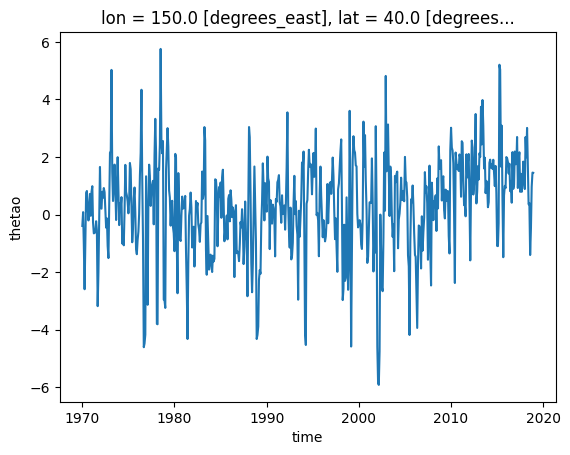

In [20]:
anom1.sel(lat=40,lon=150).plot()

北緯30度から北緯40度、東経150度から東経160度の水温偏差の領域平均値を計算する。
まず、緯度のcosineを用いて面積の重みを作成する。

In [21]:
weights1 = np.cos(np.deg2rad(sst1.lat))
weights1.name = "weights"

In [23]:
anom_r1 = anom1.sel(lat=slice(30,40), lon=slice(150,160)).weighted(weights1).mean(('lon','lat'), skipna=True)
anom_r1

<xarray.DataArray 'thetao' (time: 588)> Size: 5kB
dask.array<truediv, shape=(588,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2018-12-01
    lev      (time) float64 5kB 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    month    (time) int64 5kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12

領域平均値の時系列をプロットする。

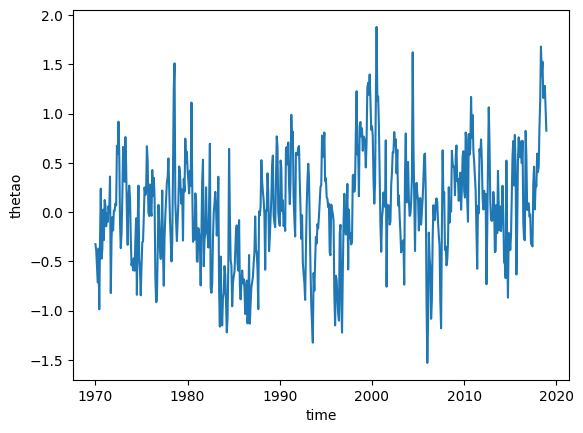

In [24]:
anom_r1.plot()

領域平均値の年平均値を求める。

In [25]:
anom_r_y1 = anom_r1.resample(time='YS').mean()
anom_r_y1

<xarray.DataArray 'thetao' (time: 49)> Size: 392B
dask.array<stack, shape=(49,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 392B 1970-01-01 1971-01-01 ... 2018-01-01

求めた領域平均値を可視化する。

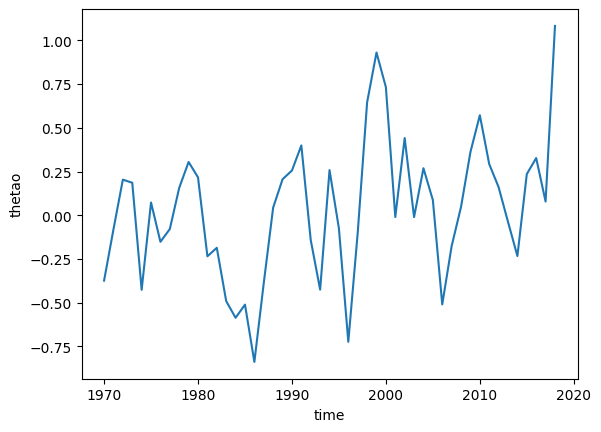

In [26]:
anom_r_y1.plot()

## 別のデータセットを読み込む

次にMIROC5を外力とした過去再現実験の海水面の水温の気候値と偏差を求める。

In [27]:
bdir = "dias-data/FORP/FORP-NP10/version4/MIROC5_historical_ver4/nc_mon/"
files = list(pathlib.Path(bdir).glob("**/forp-np-v4_thetao_mn_*.nc"))

In [28]:
ds = xr.open_mfdataset(files)
ds

/usr/local/lib/python3.11/site-packages/xarray/coding/times.py:172: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Dataset> Size: 167GB
Dimensions:  (time: 432, lev: 60, lat: 784, lon: 2049)
Coordinates:
  * time     (time) datetime64[ns] 3kB 1970-01-01 1970-02-01 ... 2005-12-01
  * lon      (lon) float64 16kB 98.82 98.91 99.0 99.09 ... 284.8 284.9 285.0
  * lat      (lat) float64 6kB -15.2 -15.1 -15.0 -14.9 ... 62.8 62.9 63.0 63.1
  * lev      (lev) float64 480B 1.0 3.5 6.5 10.0 ... 4.975e+03 5.5e+03 6.15e+03
Data variables:
    thetao   (time, lev, lat, lon) float32 167GB dask.array<chunksize=(1, 1, 784, 2049), meta=np.ndarray>
Attributes:
    CDI:                     Climate Data Interface version 1.9.9 (https://mp...
    Conventions:             None
    title:                   The Future Ocean Regional Projection (FORP) data...
    frequency:               mon
    institution:             Japan Agency for Marine-Earth Science and Techno...
    source:                  MRI.COM ver4.6
    driving_model:           MIROC5
    experiment:              historical
    license:                 Creative Commons Attribution 4.0 International L...
    project:                 Integrated Research Program for Advancing Climat...
    format_conversion_date:  Mon Aug  8 13:54:29 JST 2022
    CDO:                     Climate Data Operators version 1.9.9 (https://mp...

In [29]:
sst2 = ds.thetao.isel(lev=0)
sst2

<xarray.DataArray 'thetao' (time: 432, lat: 784, lon: 2049)> Size: 3GB
dask.array<getitem, shape=(432, 784, 2049), dtype=float32, chunksize=(1, 784, 2049), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 3kB 1970-01-01 1970-02-01 ... 2005-12-01
  * lon      (lon) float64 16kB 98.82 98.91 99.0 99.09 ... 284.8 284.9 285.0
  * lat      (lat) float64 6kB -15.2 -15.1 -15.0 -14.9 ... 62.8 62.9 63.0 63.1
    lev      float64 8B 1.0
Attributes:
    long_name:      Sea Water Potential Temperature
    units:          degC
    standard_name:  sea_water_potential_temperature

"ds"を削除する。

In [30]:
del ds

In [31]:
clim2 = sst2.sel(time=slice("1976-01-01","2005-12-31")).groupby("time.month").mean(dim="time")
clim2

<xarray.DataArray 'thetao' (month: 12, lat: 784, lon: 2049)> Size: 77MB
dask.array<stack, shape=(12, 784, 2049), dtype=float32, chunksize=(1, 784, 2049), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 16kB 98.82 98.91 99.0 99.09 ... 284.8 284.9 285.0
  * lat      (lat) float64 6kB -15.2 -15.1 -15.0 -14.9 ... 62.8 62.9 63.0 63.1
    lev      float64 8B 1.0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:      Sea Water Potential Temperature
    units:          degC
    standard_name:  sea_water_potential_temperature

In [32]:
clim2.to_netcdf('FORPv4_MIROC5_thetao_clim.nc')

In [33]:
anom2 = sst2.groupby("time.month") - clim2
anom2

<xarray.DataArray 'thetao' (time: 432, lat: 784, lon: 2049)> Size: 3GB
dask.array<sub, shape=(432, 784, 2049), dtype=float32, chunksize=(1, 784, 2049), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 3kB 1970-01-01 1970-02-01 ... 2005-12-01
  * lon      (lon) float64 16kB 98.82 98.91 99.0 99.09 ... 284.8 284.9 285.0
  * lat      (lat) float64 6kB -15.2 -15.1 -15.0 -14.9 ... 62.8 62.9 63.0 63.1
    lev      (time) float64 3kB 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    month    (time) int64 3kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12

In [34]:
anom2.to_netcdf('FORPv4_MIROC5_thetao_anom.nc')

/usr/local/lib/python3.11/site-packages/xarray/coding/times.py:172: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [35]:
weights2 = np.cos(np.deg2rad(sst2.lat))
weights2.name = "weights"
anom_r2 = anom2.sel(lat=slice(30,40), lon=slice(150,160)).weighted(weights2).mean(('lon','lat'), skipna=True)
anom_r_y2 = anom_r2.resample(time='YS').mean()

In [36]:
time1 = anom_r_y1.time
time2 = anom_r_y2.time

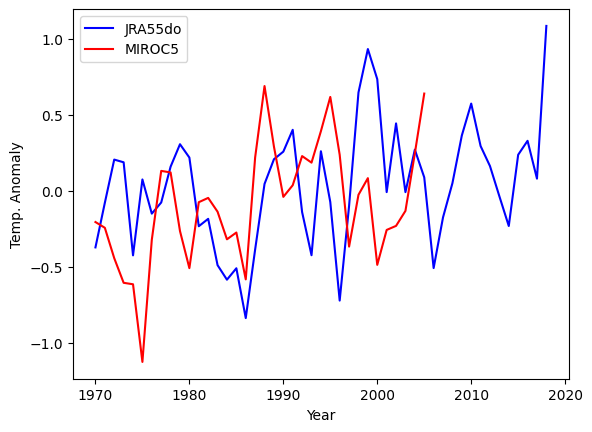

In [37]:
fig, ax = plt.subplots()
ax.set_xlabel('Year')
ax.set_ylabel('Temp. Anomaly')
ax.plot(time1, anom_r_y1, color='blue', label='JRA55do')
ax.plot(time2, anom_r_y2, color='red', label='MIROC5')
ax.legend(loc=0)

## 練習

1. MIROC5の将来予測実験の家rcp2.6またはrcp8.5の水温データを読み込んで、海面水温データを抽出しなさい。

2. MIROC5のhistoricalから作成した気候値clim2からの海面水温"sst3"の偏差を作成しなさい。

3. 北緯30度〜北緯40度、東経150度〜東経160度の領域における海面水温偏差を作成しなさい。

4. 過去再現実験の領域平均海面水温偏差の時系列図に将来実験の海面水温偏差の線を追加しなさい。

5. MIROC5の過去再現実験の海面水温偏差"anom2"から1981年から2000年の各月の平均値を求めなさい。

6. 将来予測実験の海面水温偏差"anom3"から2081年から2100年の各月の平均値を求めなさい。

7. 5と6で作成した20年平均値を差を求めなさい。そしていずれかの月における20年平均地の差の空間分布図を可視化しなさい。